# Iris Dataset Classifier

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset
1. Read dataset from speicified path
2. Drop non-informative columns (ID)
3. Separate Xs and Labels

In [2]:
# Read dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Drop ID column
train_data = train_data.drop(['Id'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

# Separate Xs and Labels
X_train = train_data.values[:, :-1]
Y_train = train_data.values[:, -1]

X_test = test_data.values[:, :-1]
Y_test = test_data.values[:, -1]

### Function for encoding Iris classes

In [3]:
def encode_labels(labels):
    lables_copy = labels.copy()
    types = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    for i in range(len(labels)):
        lables_copy[i] = types[labels[i]]
    return lables_copy

### Data Visualization

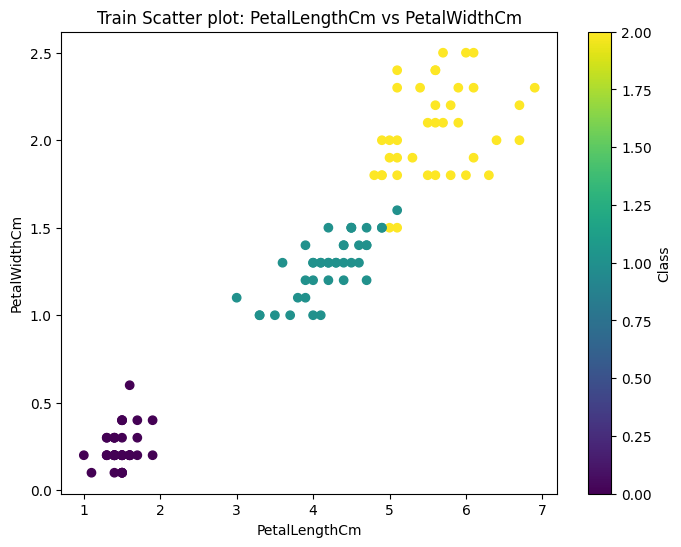

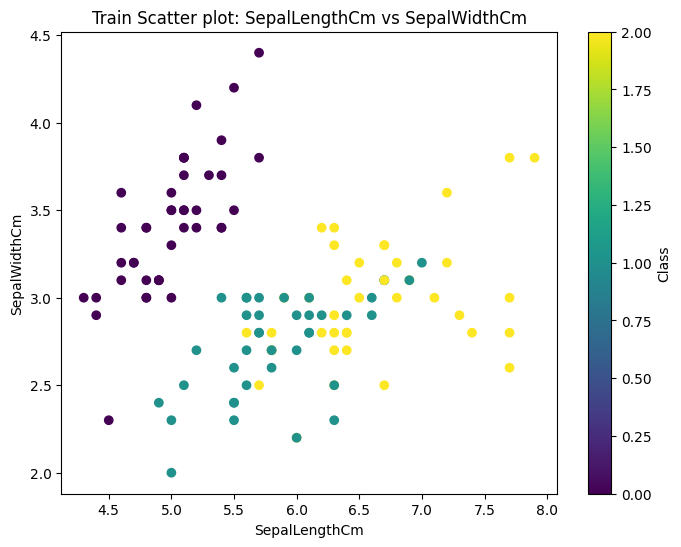

In [4]:
petal_features = ['PetalLengthCm', 'PetalWidthCm']
sepal_features = ['SepalLengthCm', 'SepalWidthCm']

# Petal length and width
plt.figure(figsize=(8, 6))
plt.scatter(train_data[petal_features[0]], train_data[petal_features[1]], c=encode_labels(Y_train), cmap='viridis')
plt.xlabel(petal_features[0])
plt.ylabel(petal_features[1])
plt.title(f'Train Scatter plot: {petal_features[0]} vs {petal_features[1]}')
plt.colorbar(label='Class')
plt.show()

# Sepal length and width
plt.figure(figsize=(8, 6))
plt.scatter(train_data[sepal_features[0]], train_data[sepal_features[1]], c=encode_labels(Y_train), cmap='viridis')
plt.xlabel(sepal_features[0])
plt.ylabel(sepal_features[1])
plt.title(f'Train Scatter plot: {sepal_features[0]} vs {sepal_features[1]}')
plt.colorbar(label='Class')
plt.show()

### KNN Classifier

This Python code defines a k-nearest neighbors (KNN) classifier class (KNNClassifier). The class includes methods for fitting the model, calculating Euclidean distances, making predictions, computing accuracy, and evaluating precision, recall, and F1 score for a multi-class classification task (specifically, the Iris dataset). The KNN algorithm is implemented with functionalities to handle ties and calculate performance metrics. The class encapsulates common operations for KNN classification, providing a modular and reusable implementation.

In [5]:
class KNNClassifier:
    def __init__(self, k) -> None:
        self.k = k
        self.X_train = None
        self.Y_train = None


    def fit(self, X, Y):
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of training examples must match the number of labels.")

        self.X_train = X
        self.Y_train = Y


    def eucledian(self, p1, p2):
        dist = np.sqrt(np.sum((p1-p2)**2))
        return dist
        

    def predict(self, X_test):
        predictions = []

        for x_test in X_test:
            distances = []

            for x in self.X_train:
                d = self.eucledian(x, x_test)
                distances.append(d)
            
            # Sort first k datapoints 
            indices = np.argsort(np.array(distances))[:self.k]
            
            # Labels of k data points
            labels = self.Y_train[indices]
            
            unique_labels, counts = np.unique(labels, return_counts=True)
            max_count = np.max(counts)
            tied_classes = unique_labels[counts == max_count]
            
            if len(tied_classes) == 1:
                # No tie
                predicted_label = tied_classes[0]
            else:
                # Tie: Choose class of nearest neighbor
                nearest_neighbor_index = np.argmin(distances)
                predicted_label = self.Y_train[nearest_neighbor_index]

            predictions.append(predicted_label)

        return np.array(predictions)
    

    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        accuracy = correct_predictions / len(y_true)
        return accuracy
    

    def precision_and_recall(self, y_true, y_pred, class_label):
        precision = 0
        recall = 0
        
        tp = np.sum((y_true == class_label) & (y_pred == class_label))
        fp = np.sum((y_true != class_label) & (y_pred == class_label))
        fn = np.sum((y_true == class_label) & (y_pred != class_label))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        return precision, recall


    def f1_score(self, y_true, y_pred):
        f1_list = []
        class_labels = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
        for label in class_labels:
            P, R = self.precision_and_recall(y_true, y_pred, label)
            f1 = (2 * P * R) / (P + R) if (P + R) > 0 else 0
            f1_list.append(f1)

        return np.mean(f1)

### KNN Predicions
Create an instance of KNN with k=3 and predict unobserved data

In [6]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(X_train, Y_train)
predictions = knn_classifier.predict(X_test)

### Accuracy
Acc = Number of Correct Prediction / Total Predictions

In [7]:
print(knn_classifier.accuracy(Y_test, predictions))

0.9333333333333333


### F1 Score

In [8]:
print(knn_classifier.f1_score(Y_test, predictions))

1.0


### Confusion Matrix
Plot confusion matrix for observing performance of the KNN

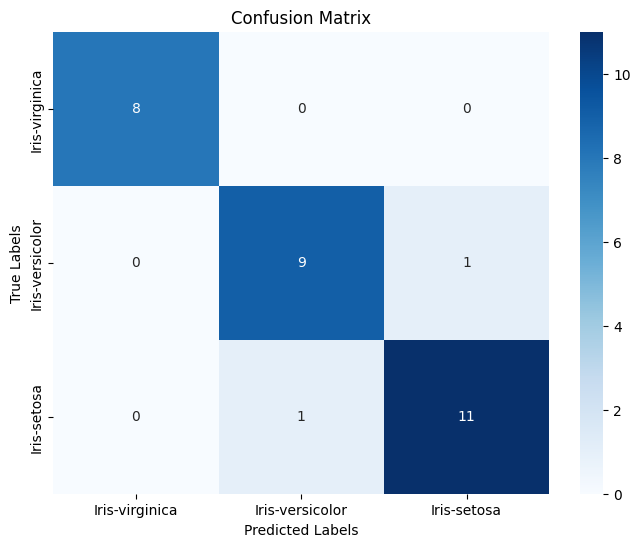

In [9]:
class_labels = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

conf_matrix = confusion_matrix(Y_test, predictions)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Prediction Visualization
Visualize preidcted and ground truth labels

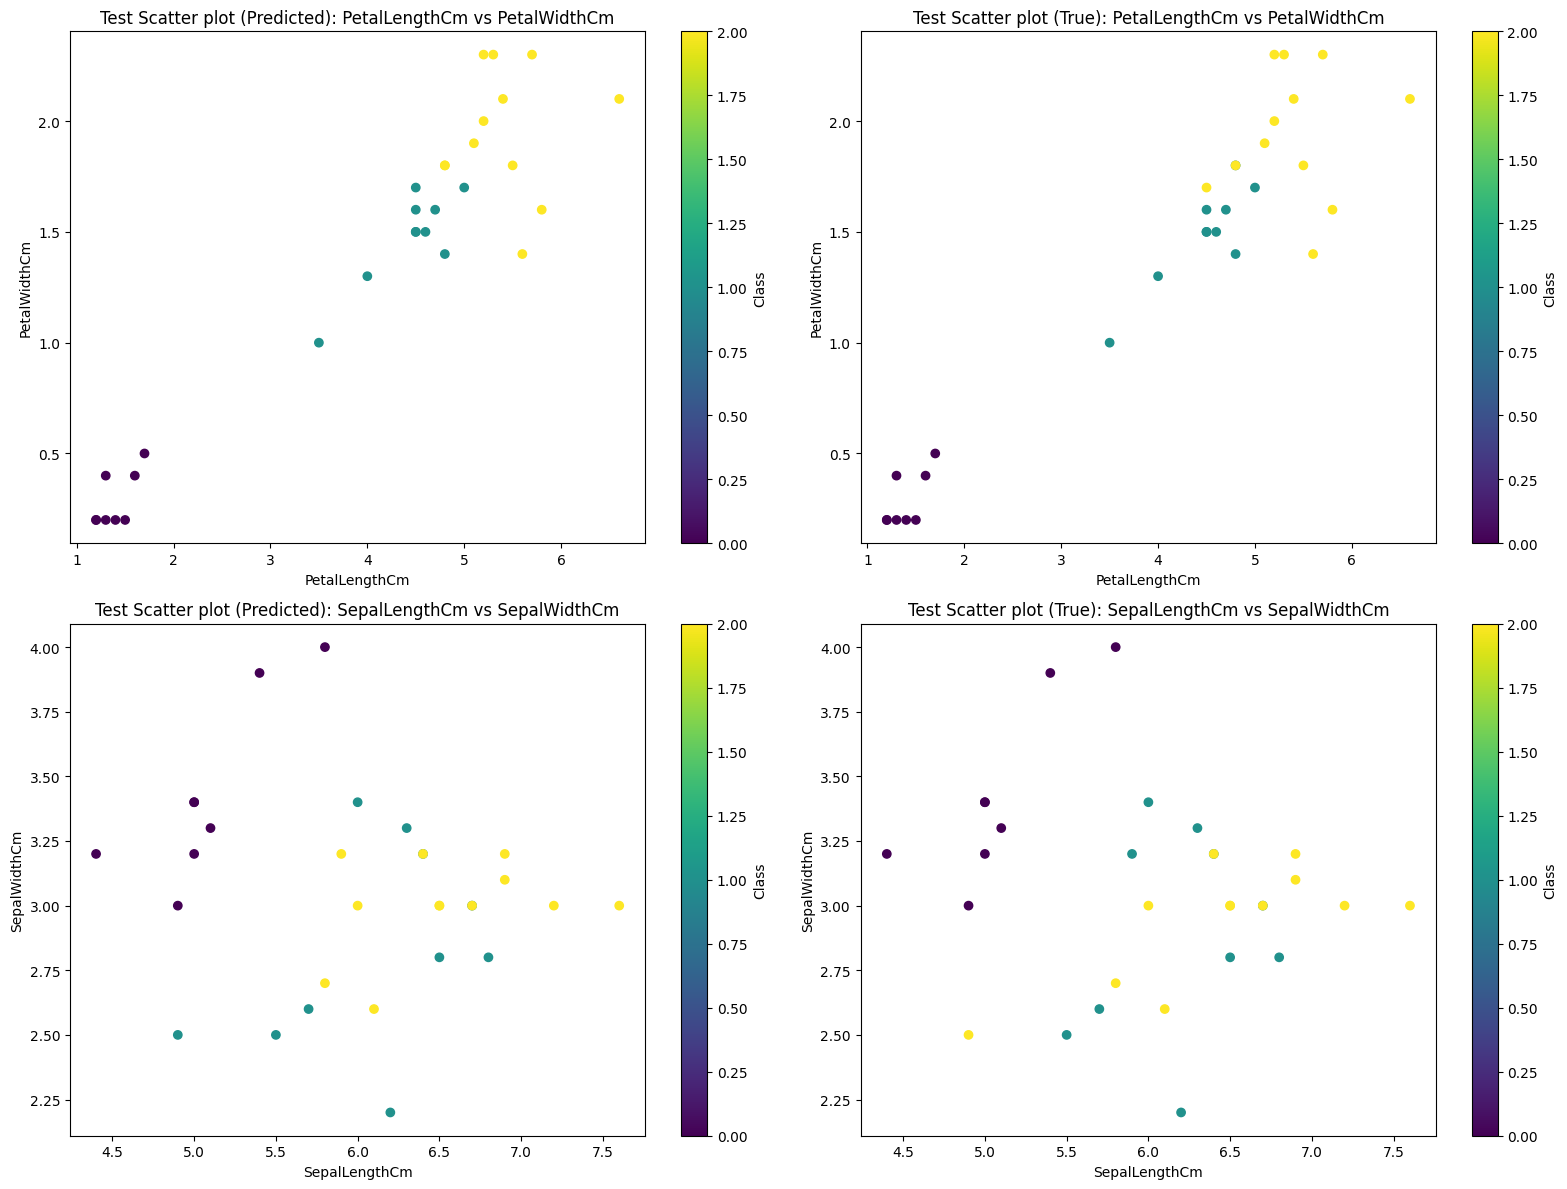

In [10]:
# Create a 2x2 grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot with predicted labels (Top Left)
scatter_pred = axes[0, 0].scatter(test_data[petal_features[0]], test_data[petal_features[1]], c=encode_labels(predictions.tolist()), cmap='viridis')
axes[0, 0].set_xlabel(petal_features[0])
axes[0, 0].set_ylabel(petal_features[1])
axes[0, 0].set_title(f'Test Scatter plot (Predicted): {petal_features[0]} vs {petal_features[1]}')
plt.colorbar(scatter_pred, ax=axes[0, 0], label='Class')

# Plot with true labels (Top Right)
scatter_true = axes[0, 1].scatter(test_data[petal_features[0]], test_data[petal_features[1]], c=encode_labels(Y_test), cmap='viridis')
axes[0, 1].set_xlabel(petal_features[0])
axes[0, 1].set_ylabel(petal_features[1])
axes[0, 1].set_title(f'Test Scatter plot (True): {petal_features[0]} vs {petal_features[1]}')
plt.colorbar(scatter_true, ax=axes[0, 1], label='Class')

# Plot with predicted labels (Bottom Left)
scatter_pred_sepal = axes[1, 0].scatter(test_data[sepal_features[0]], test_data[sepal_features[1]], c=encode_labels(predictions.tolist()), cmap='viridis')
axes[1, 0].set_xlabel(sepal_features[0])
axes[1, 0].set_ylabel(sepal_features[1])
axes[1, 0].set_title(f'Test Scatter plot (Predicted): {sepal_features[0]} vs {sepal_features[1]}')
plt.colorbar(scatter_pred_sepal, ax=axes[1, 0], label='Class')

# Plot with true labels (Bottom Right)
scatter_true_sepal = axes[1, 1].scatter(test_data[sepal_features[0]], test_data[sepal_features[1]], c=encode_labels(Y_test), cmap='viridis')
axes[1, 1].set_xlabel(sepal_features[0])
axes[1, 1].set_ylabel(sepal_features[1])
axes[1, 1].set_title(f'Test Scatter plot (True): {sepal_features[0]} vs {sepal_features[1]}')
plt.colorbar(scatter_true_sepal, ax=axes[1, 1], label='Class')

plt.tight_layout()
plt.show()


### Save Results as .CSV file

In [11]:
df = pd.DataFrame(predictions, columns=['Species'])
df.to_csv('iris_pred.csv', index=False)